In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os 
from scipy.sparse import coo_matrix


In [ ]:
train_data = pd.read_csv(r"C:\Users\USER\Downloads\crimes.csv")
train_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Desc',
       'Status Desc', 'LOCATION'],
      dtype='object')

In [3]:
print(train_data.head(1))

       DR_NO   Date Rptd    DATE OCC  TIME OCC  AREA NAME        Crm Cd Desc  \
0  220314085  2022-07-22  2020-05-12      1110  Southwest  THEFT OF IDENTITY   

   Vict Age Vict Sex Vict Descent Weapon Desc  Status Desc  \
0        27        F            B         NaN  Invest Cont   

                                  LOCATION  
0  2500 S  SYCAMORE                     AV  


In [4]:
train_data.shape

(185715, 12)

In [5]:
train_data.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [6]:

train_data["Vict Sex"] = train_data["Vict Sex"].replace({"F": 0, "M": 1})

# Convert Weapon Desc, assuming you want to set non-numeric descriptions to 1
train_data["Weapon Desc"] = pd.to_numeric(train_data["Weapon Desc"], errors='coerce').fillna(1).astype(int)


In [7]:
print(train_data.head(1))

       DR_NO   Date Rptd    DATE OCC  TIME OCC  AREA NAME        Crm Cd Desc  \
0  220314085  2022-07-22  2020-05-12      1110  Southwest  THEFT OF IDENTITY   

   Vict Age Vict Sex Vict Descent  Weapon Desc  Status Desc  \
0        27        0            B            1  Invest Cont   

                                  LOCATION  
0  2500 S  SYCAMORE                     AV  


In [8]:
# Replace "ColumnName" with the name of the column
single_column_train_data = train_data[["Weapon Desc"]]
print(single_column_train_data)
train_data.head(2)


        Weapon Desc
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
185710            1
185711            1
185712            1
185713            1
185714            1

[185715 rows x 1 columns]


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,0,B,1,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,1,H,1,Invest Cont,3300 SAN MARINO ST


In [9]:
train_data["Vict Sex"] = train_data["Vict Sex"].fillna(0)


In [10]:
# Replace "ColumnName" with the name of the column you want to drop
train_data.drop("Vict Descent", axis=1, inplace=True)


In [11]:
train_data.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Weapon Desc,Status Desc,LOCATION
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,1,1,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,1,1,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,0,1,Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,1,1,Invest Cont,6100 S VERMONT AV
185714,230906458,2023-03-05,2023-03-05,900,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,0,1,Invest Cont,14500 HARTLAND ST


In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA NAME',
       'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Weapon Desc', 'Status Desc',
       'LOCATION'],
      dtype='object')

In [14]:
# Analyze most common age
most_common_age = train_data['Vict Age'].value_counts().idxmax()
print(f"The most common age of rape victims: {most_common_age}")

# Analyze most common sex
most_common_sex = train_data['Vict Sex'].value_counts().idxmax()
print(f"The most common sex of rape victims: {most_common_sex}")


The most common age of rape victims: 30
The most common sex of rape victims: 1


In [15]:
# Ensure time column is in datetime format
train_data['Date Rptd'] = pd.to_datetime(train_data['Date Rptd'], errors='coerce')

# Extract hour from time
train_data['date'] = train_data['Date Rptd'].dt.date

# Find the most common hour
most_common_date = train_data['date'].value_counts().idxmax()
print(f"The most common time of occurrence: {most_common_date}")


The most common time of occurrence: 2023-02-03


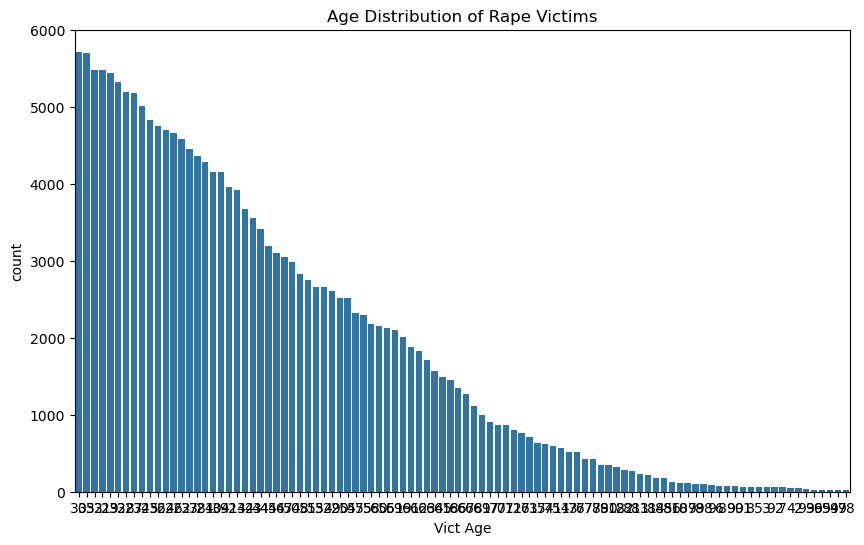

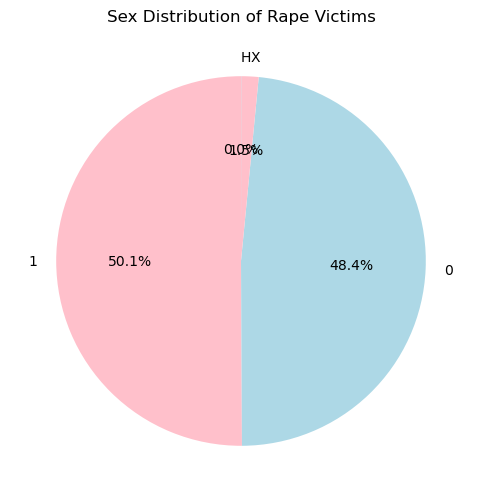

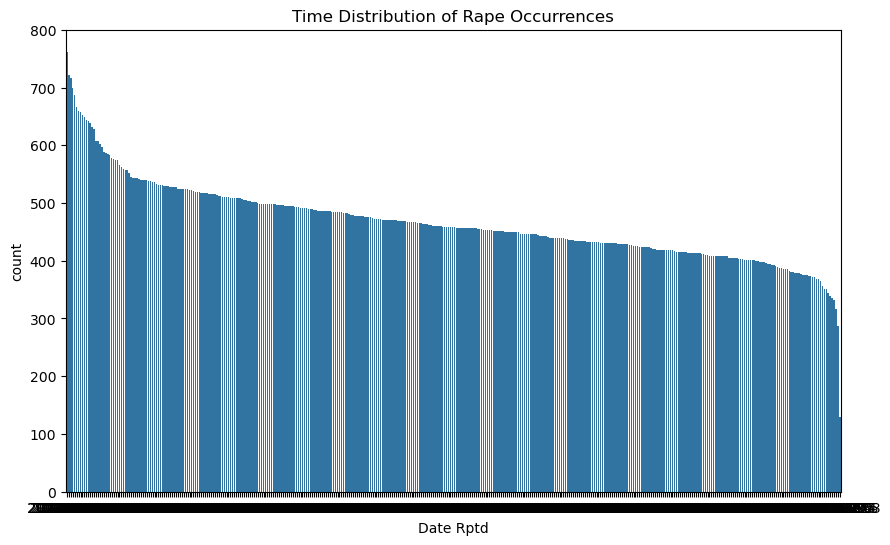

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Vict Age', data=train_data, order=train_data['Vict Age'].value_counts().index)
plt.title("Age Distribution of Rape Victims")
plt.show()

# Sex distribution
plt.figure(figsize=(6, 6))
train_data['Vict Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title("Sex Distribution of Rape Victims")
plt.ylabel('')
plt.show()

# Time distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Date Rptd', data=train_data, order=train_data['Date Rptd'].value_counts().index)
plt.title("Time Distribution of Rape Occurrences")
plt.show()


In [17]:
average_ratings = train_data.groupby(['Date Rptd', 'TIME OCC', 'Vict Age', 'Vict Sex'])['AREA NAME'].unique().reset_index()

In [18]:
# Group by 'AREA NAME' and count the number of occurrences
grouped_areas = train_data['AREA NAME'].value_counts().reset_index()

# Rename columns for clarity
grouped_areas.columns = ['AREA NAME', 'Case Count']

# Sort areas by the number of cases in descending order
sorted_areas = grouped_areas.sort_values(by='Case Count', ascending=False)

# Add a Ratings column based on thresholds
def assign_rating(count):
    if count > 10000:  # Example threshold for 'Extreme'
        return "Extreme"
    elif count > 5000:  # Example threshold for 'High'
        return "High"
    elif count > 2000:  # Example threshold for 'Moderate'
        return "Moderate"
    else:
        return "Low"

sorted_areas['Rating'] = sorted_areas['Case Count'].apply(assign_rating)

print(sorted_areas)


      AREA NAME  Case Count   Rating
0       Central       14944  Extreme
1     Southwest       11945  Extreme
2   77th Street       11739  Extreme
3       Pacific        9923     High
4     Hollywood        9762     High
5     Southeast        9571     High
6       Olympic        9414     High
7        Newton        9152     High
8      Van Nuys        8621     High
9   N Hollywood        8502     High
10     Wilshire        8482     High
11      Topanga        8478     High
12      Rampart        8346     High
13  West Valley        8102     High
14      West LA        7911     High
15    Northeast        7628     High
16   Devonshire        7411     High
17      Mission        6990     High
18       Harbor        6618     High
19   Hollenbeck        6193     High
20     Foothill        5983     High


In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans




In [20]:
pip install folium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import folium

In [22]:
# Create the dataset
data = {
    'AREA NAME': ['Central', 'Southwest', '77th Street', 'Pacific', 'Hollywood', 'Southeast',
                  'Olympic', 'Newton', 'Van Nuys', 'N Hollywood', 'Wilshire', 'Topanga',
                  'Rampart', 'West Valley', 'West LA', 'Northeast', 'Devonshire', 'Mission',
                  'Harbor', 'Hollenbeck', 'Foothill'],
    'Case Count': [14944, 11945, 11739, 9923, 9762, 9571, 9414, 9152, 8621, 8502, 8482, 8478,
                   8346, 8102, 7911, 7628, 7411, 6990, 6618, 6193, 5983],
    'Rating': ['Extreme', 'Extreme', 'Extreme', 'High', 'High', 'High', 'High', 'High', 'High',
               'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 
               'High', 'High']
}

df = pd.DataFrame(data)

# Map Rating to numerical scores
rating_map = {'Extreme': 3, 'High': 2}
df['Risk Score'] = df['Rating'].map(rating_map)

# Normalize Case Count and Risk Score
scaler = MinMaxScaler()
df[['Normalized Case Count', 'Normalized Risk']] = scaler.fit_transform(df[['Case Count', 'Risk Score']])

# Combine metrics for overall risk score
df['Overall Risk'] = df['Normalized Case Count'] + df['Normalized Risk']


In [23]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Case Count', 'Risk Score']])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


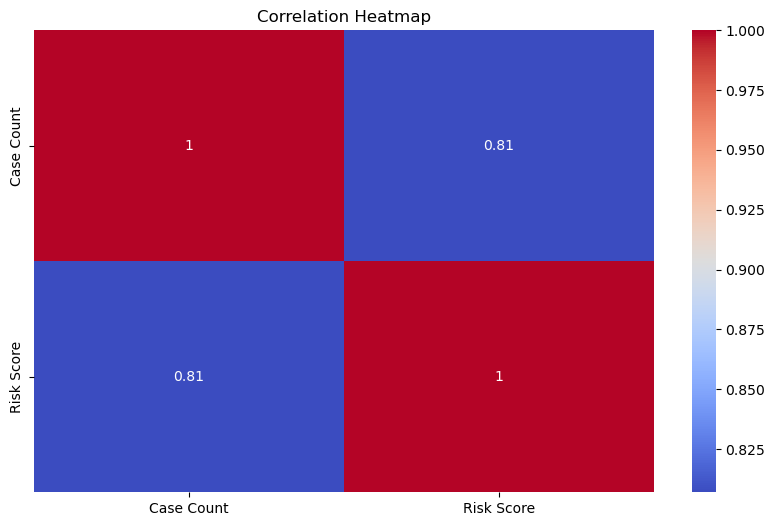

In [24]:
# Heatmap to visualize area risks
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Case Count', 'Risk Score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [25]:
# Initialize map (example coordinates for demonstration)
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Add markers for each area
for _, row in df.iterrows():
    folium.Marker(
        location=(34.0522 + (row.name / 100), -118.2437 - (row.name / 200)),  # Dummy coordinates
        popup=f"{row['AREA NAME']} - Risk: {row['Overall Risk']:.2f}",
        icon=folium.Icon(color="red" if row['Risk Score'] == 3 else "orange")
    ).add_to(m)

m.save('location_risk_map.html')  # Save map as HTML


In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create the dataset
data = {
    'AREA NAME': ['Central', 'Southwest', '77th Street', 'Pacific', 'Hollywood', 'Southeast',
                  'Olympic', 'Newton', 'Van Nuys', 'N Hollywood', 'Wilshire', 'Topanga',
                  'Rampart', 'West Valley', 'West LA', 'Northeast', 'Devonshire', 'Mission',
                  'Harbor', 'Hollenbeck', 'Foothill'],
    'Case Count': [14944, 11945, 11739, 9923, 9762, 9571, 9414, 9152, 8621, 8502, 8482, 8478,
                   8346, 8102, 7911, 7628, 7411, 6990, 6618, 6193, 5983],
    'Rating': ['Extreme', 'Extreme', 'Extreme', 'High', 'High', 'High', 'High', 'High', 'High',
               'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 
               'High', 'High']
}

df = pd.DataFrame(data)

# Map Rating to numerical scores
rating_map = {'Extreme': 3, 'High': 2}
df['Risk Score'] = df['Rating'].map(rating_map)

# Normalize Case Count and Risk Score
scaler = MinMaxScaler()
df[['Normalized Case Count', 'Normalized Risk']] = scaler.fit_transform(df[['Case Count', 'Risk Score']])

# Combine metrics for overall risk score
df['Overall Risk'] = df['Normalized Case Count'] + df['Normalized Risk']

# Display the DataFrame to check
df


,AREA NAME,Case Count,Rating,Risk Score,Normalized Case Count,Normalized Risk,Overall Risk
0,Central,14944,Extreme,3,1.000000,1.0,2.000000
1,Southwest,11945,Extreme,3,0.665328,1.0,1.665328
2,77th Street,11739,Extreme,3,0.642339,1.0,1.642339
3,Pacific,9923,High,2,0.439683,0.0,0.439683
4,Hollywood,9762,High,2,0.421716,0.0,0.421716
5,Southeast,9571,High,2,0.400402,0.0,0.400402
6,Olympic,9414,High,2,0.382881,0.0,0.382881
7,Newton,9152,High,2,0.353644,0.0,0.353644
8,Van Nuys,8621,High,2,0.294387,0.0,0.294387
9,N Hollywood,8502,High,2,0.281107,0.0,0.281107


In [27]:
def recommend_area(df, threshold=0.8):
    """
    Recommend areas based on overall risk level.
    
    Parameters:
    - df: DataFrame with area data and overall risk scores
    - threshold: risk level above which an alert is triggered
    
    Returns:
    - List of areas with risk above the threshold
    """
    # Filter areas by Overall Risk score
    high_risk_areas = df[df['Overall Risk'] > threshold]
    
    # Generate alerts for the high-risk areas
    alerts = []
    for _, row in high_risk_areas.iterrows():
        alerts.append(f"Warning: High-risk area - {row['AREA NAME']} with Risk Score {row['Overall Risk']:.2f}")
    
    return alerts

# Example usage:
alerts = recommend_area(df, threshold=0.8)
for alert in alerts:
    print(alert)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12820\3409059079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AREA NAME', y='Overall Risk', data=df, palette="coolwarm")


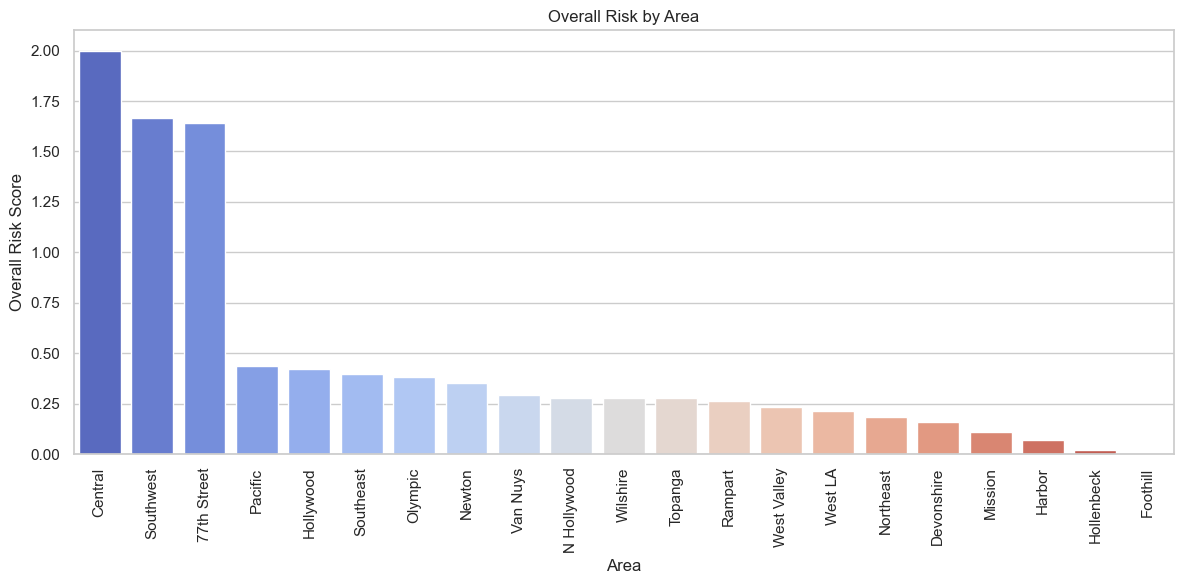

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Bar plot for Overall Risk
plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='Overall Risk', data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Overall Risk by Area")
plt.ylabel("Overall Risk Score")
plt.xlabel("Area")
plt.tight_layout()
plt.show()


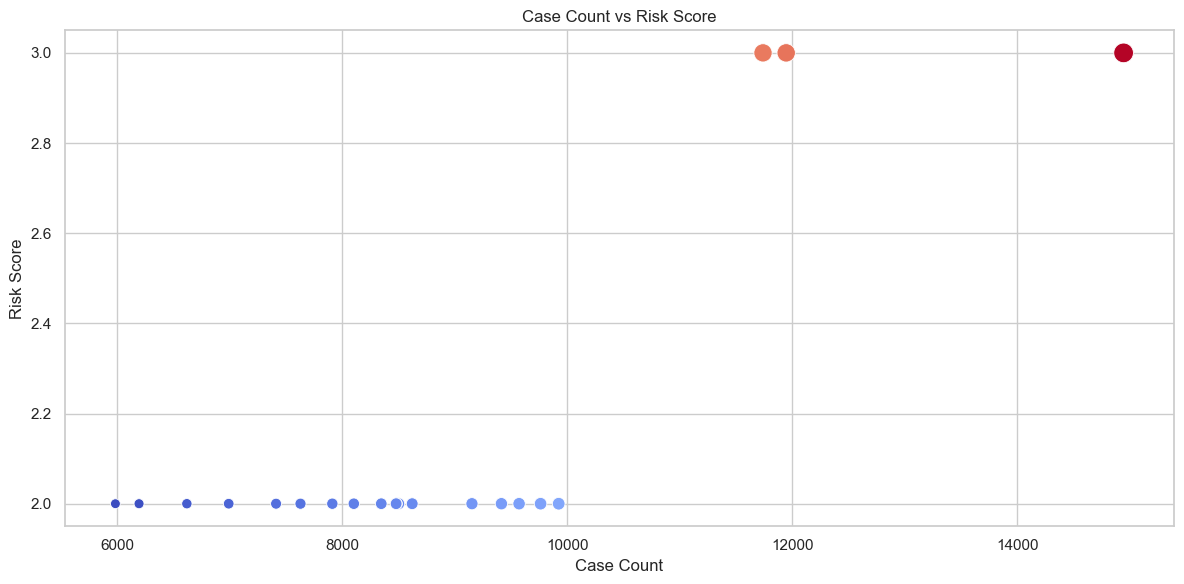

In [29]:
# Scatter plot for Case Count vs Risk Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Case Count', y='Risk Score', hue='Overall Risk', size='Overall Risk', data=df, sizes=(50, 200), palette="coolwarm", legend=None)
plt.title("Case Count vs Risk Score")
plt.xlabel("Case Count")
plt.ylabel("Risk Score")
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
from geopy.distance import geodesic
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Sample area coordinates (latitude, longitude)
area_coordinates = {
    'Central': (34.0522, -118.2437),
    'Southwest': (33.9767, -118.2208),
    '77th Street': (33.9746, -118.2927),
    'Pacific': (34.0608, -118.2862),
    'Hollywood': (34.0928, -118.3287),
    'Southeast': (33.9394, -118.2275),
    'Olympic': (34.0320, -118.2615),
    'Newton': (34.0619, -118.2789),
    'Van Nuys': (34.1869, -118.4464),
    'N Hollywood': (34.1706, -118.3773),
    'Wilshire': (34.0630, -118.2660),
    'Topanga': (34.2329, -118.5981),
    'Rampart': (34.0702, -118.2773),
    'West Valley': (34.2296, -118.6067),
    'West LA': (34.0460, -118.4602),
    'Northeast': (34.1156, -118.2114),
    'Devonshire': (34.2587, -118.5301),
    'Mission': (34.3015, -118.4403),
    'Harbor': (33.7437, -118.2883),
    'Hollenbeck': (34.0650, -118.1997),
    'Foothill': (34.2539, -118.4915)
}

# Add coordinates to the DataFrame
df = pd.DataFrame(data)
df['Coordinates'] = df['AREA NAME'].map(area_coordinates)


In [32]:
# User's location (latitude, longitude)
user_location = (34.0522, -118.2437)  # Example: Central LA

# Function to calculate the distance to the user from each area
def calculate_distance(user_location, area_coordinates):
    return geodesic(user_location, area_coordinates).kilometers

# Calculate the distance for each area in the DataFrame
df['Distance to User'] = df['Coordinates'].map(lambda x: calculate_distance(user_location, x))

# Normalize the distance (for better weighting later)
scaler = MinMaxScaler()
df['Normalized Distance'] = scaler.fit_transform(df[['Distance to User']])


In [33]:
# User's location (latitude, longitude)
user_location = (34.0522, -118.2437)  # Example: Central LA

# Function to calculate the distance to the user from each area
def calculate_distance(user_location, area_coordinates):
    return geodesic(user_location, area_coordinates).kilometers

# Calculate the distance for each area in the DataFrame
df['Distance to User'] = df['Coordinates'].map(lambda x: calculate_distance(user_location, x))

# Normalize the distance (for better weighting later)
scaler = MinMaxScaler()
df['Normalized Distance'] = scaler.fit_transform(df[['Distance to User']])


In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {
    'AREA NAME': ['Central', 'Southwest', '77th Street', 'Pacific', 'Hollywood', 'Southeast',
                  'Olympic', 'Newton', 'Van Nuys', 'N Hollywood', 'Wilshire', 'Topanga',
                  'Rampart', 'West Valley', 'West LA', 'Northeast', 'Devonshire', 'Mission',
                  'Harbor', 'Hollenbeck', 'Foothill'],
    'Case Count': [14944, 11945, 11739, 9923, 9762, 9571, 9414, 9152, 8621, 8502, 8482, 8478,
                   8346, 8102, 7911, 7628, 7411, 6990, 6618, 6193, 5983],
    'Rating': ['Extreme', 'Extreme', 'Extreme', 'High', 'High', 'High', 'High', 'High', 'High',
               'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 'High', 
               'High', 'High']
}

# Create DataFrame
df = pd.DataFrame(data)

# Map Rating to numerical scores
rating_map = {'Extreme': 3, 'High': 2}
df['Risk Score'] = df['Rating'].map(rating_map)

# Normalize Case Count and Risk Score using MinMaxScaler
scaler = MinMaxScaler()
df[['Normalized Case Count', 'Normalized Risk']] = scaler.fit_transform(df[['Case Count', 'Risk Score']])

# Calculate Overall Risk (sum of Normalized Case Count and Normalized Risk)
df['Overall Risk'] = df['Normalized Case Count'] + df['Normalized Risk']

# Add mock 'Normalized Distance' for location-based filtering (you can replace this with actual distance calculation)
df['Normalized Distance'] = [0.1, 0.2, 0.15, 0.3, 0.25, 0.1, 0.4, 0.35, 0.2, 0.3, 0.1, 0.25, 0.3, 0.4, 0.2, 0.15, 0.25, 0.1, 0.3, 0.35, 0.2]

# Combine both metrics for overall risk score (Hybrid Risk Score)
df['Hybrid Risk Score'] = df['Overall Risk'] - df['Normalized Distance']

# Rank areas by Hybrid Risk Score (higher score means more risk)
df['Ranked Risk'] = df['Hybrid Risk Score'].rank(ascending=False)

# Display areas with the highest combined risk
df_sorted = df.sort_values(by='Hybrid Risk Score', ascending=False)
print(df_sorted[['AREA NAME', 'Hybrid Risk Score', 'Normalized Distance', 'Overall Risk', 'Normalized Case Count']])


      AREA NAME  Hybrid Risk Score  Normalized Distance  Overall Risk  \
0       Central           1.900000                 0.10      2.000000   
2   77th Street           1.492339                 0.15      1.642339   
1     Southwest           1.465328                 0.20      1.665328   
5     Southeast           0.300402                 0.10      0.400402   
10     Wilshire           0.178875                 0.10      0.278875   
4     Hollywood           0.171716                 0.25      0.421716   
3       Pacific           0.139683                 0.30      0.439683   
8      Van Nuys           0.094387                 0.20      0.294387   
15    Northeast           0.033573                 0.15      0.183573   
11      Topanga           0.028429                 0.25      0.278429   
14      West LA           0.015155                 0.20      0.215155   
17      Mission           0.012376                 0.10      0.112376   
7        Newton           0.003644                 

In [35]:
print(df.columns)


Index(['AREA NAME', 'Case Count', 'Rating', 'Risk Score',
       'Normalized Case Count', 'Normalized Risk', 'Overall Risk',
       'Normalized Distance', 'Hybrid Risk Score', 'Ranked Risk'],
      dtype='object')


In [36]:
def recommend_high_risk_areas(df, top_n=5):
    """
    Recommend top N high-risk areas based on both crime risk and proximity to the user.
    """
    return df.head(top_n)

# Example: Recommend top 5 areas
top_areas = recommend_high_risk_areas(df_sorted, top_n=5)
top_areas[['AREA NAME', 'Hybrid Risk Score', 'Normalized Distance']]


,AREA NAME,Hybrid Risk Score,Normalized Distance
0,Central,1.900000,0.10
2,77th Street,1.492339,0.15
1,Southwest,1.465328,0.20
5,Southeast,0.300402,0.10
10,Wilshire,0.178875,0.10


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12820\2495021030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AREA NAME', y='Hybrid Risk Score', data=df_sorted, palette="coolwarm")


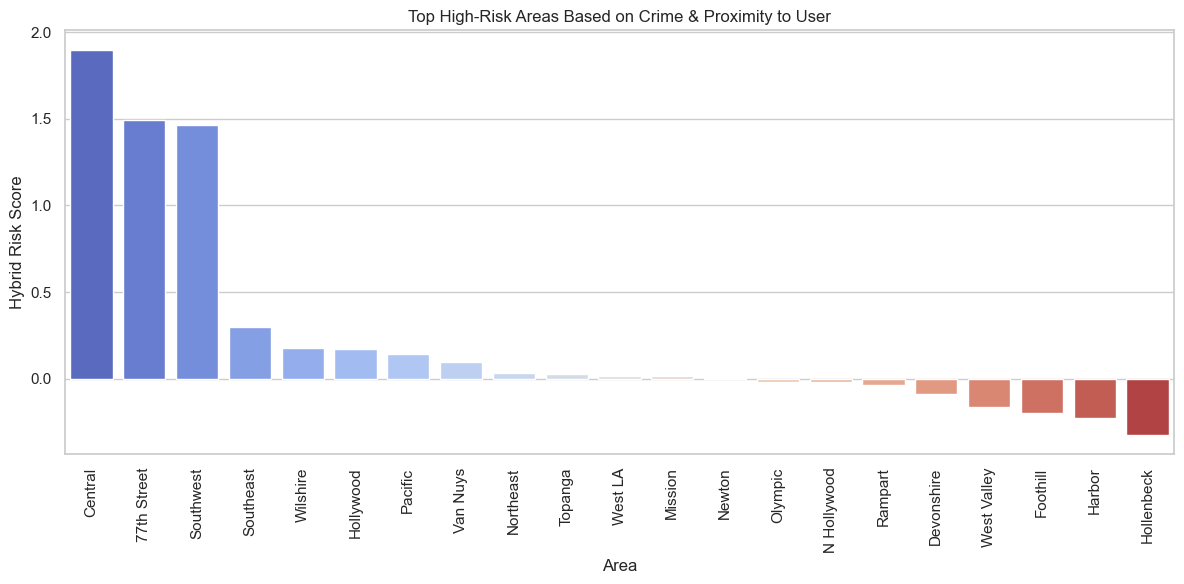

In [37]:
# Bar plot for Hybrid Risk Score
plt.figure(figsize=(12, 6))
sns.barplot(x='AREA NAME', y='Hybrid Risk Score', data=df_sorted, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top High-Risk Areas Based on Crime & Proximity to User")
plt.xlabel("Area")
plt.ylabel("Hybrid Risk Score")
plt.tight_layout()
plt.show()


In [38]:
print(df.columns)


Index(['AREA NAME', 'Case Count', 'Rating', 'Risk Score',
       'Normalized Case Count', 'Normalized Risk', 'Overall Risk',
       'Normalized Distance', 'Hybrid Risk Score', 'Ranked Risk'],
      dtype='object')
